# Plant Disease Prediction

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [6]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [12]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [13]:
import tensorflow as tf

# Initialize a Sequential model
cnn = tf.keras.Sequential()

# Define the input layer with the shape (128, 128, 3)
cnn.add(tf.keras.Input(shape=[128, 128, 3]))  # Define the input shape

# Add Conv2D layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# You can continue adding more layers as needed, e.g., Flatten, Dense, etc.


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
2197/2197 [==============================] - 283s 124ms/step - loss: 1.4395 - accuracy: 0.5769 - val_loss: 0.5248 - val_accuracy: 0.8362
Epoch 2/20
2197/2197 [==============================] - 891s 405ms/step - loss: 0.4338 - accuracy: 0.8617 - val_loss: 0.2828 - val_accuracy: 0.9071
Epoch 3/20
2197/2197 [==============================] - 202s 92ms/step - loss: 0.2588 - accuracy: 0.9169 - val_loss: 0.2329 - val_accuracy: 0.9254
Epoch 4/20
2197/2197 [==============================] - 195s 88ms/step - loss: 0.1794 - accuracy: 0.9411 - val_loss: 0.2217 - val_accuracy: 0.9288
Epoch 5/20
2197/2197 [==============================] - 193s 88ms/step - loss: 0.1276 - accuracy: 0.9582 - val_loss: 0.1423 - val_accuracy: 0.9562
Epoch 6/20
2197/2197 [==============================] - 192s 87ms/step - loss: 0.1056 - accuracy: 0.9657 - val_loss: 0.1217 - val_accuracy: 0.9636
Epoch 7/20
2197/2197 [==============================] - 190s 86ms/step - loss: 0.0844 - accuracy: 0.9720 - val_loss:

## Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 54s 24ms/step - loss: 0.0141 - accuracy: 0.9955
Training accuracy: 0.9954904317855835


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 24ms/step - loss: 0.1016 - accuracy: 0.9722
Validation accuracy: 0.9722285270690918


### Saving Model

In [28]:
cnn.save('trained_plant_disease_model_2.keras')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [1.439469575881958,
  0.4338412582874298,
  0.2587830722332001,
  0.17937855422496796,
  0.12761591374874115,
  0.10559766739606857,
  0.08435828983783722,
  0.07197212427854538,
  0.062149129807949066,
  0.05637582764029503,
  0.04833070933818817,
  0.045243993401527405,
  0.039969414472579956,
  0.03877945616841316,
  0.032378993928432465,
  0.033646173775196075,
  0.03166971355676651,
  0.029503267258405685,
  0.026328476145863533,
  0.027776401489973068],
 'accuracy': [0.5769258141517639,
  0.8617398142814636,
  0.9168930649757385,
  0.9411337971687317,
  0.9582189321517944,
  0.9657158851623535,
  0.9719610214233398,
  0.9762572050094604,
  0.9798420667648315,
  0.9812504649162292,
  0.9844369888305664,
  0.9856320023536682,
  0.9871256947517395,
  0.9872394800186157,
  0.989501416683197,
  0.9892879724502563,
  0.98978590965271,
  0.990696370601654,
  0.991521418094635,
  0.9912938475608826],
 'val_loss': [0.5248145461082458,
  0.28284433484077454,
  0.2329254150390625,


In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

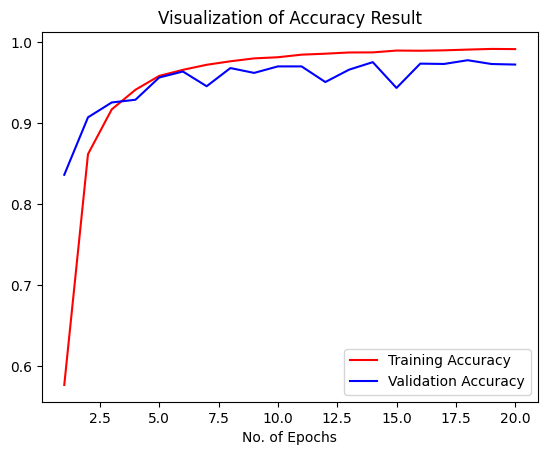

In [33]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 48s 3ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.0 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.0 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.0 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.0 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.0 MB 2.3 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.0 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/1

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.95       504
                                 Apple___Black_rot       0.83      1.00      0.91       497
                          Apple___Cedar_apple_rust       1.00      0.98      0.99       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.88      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

### Confusion Matrix Visualization

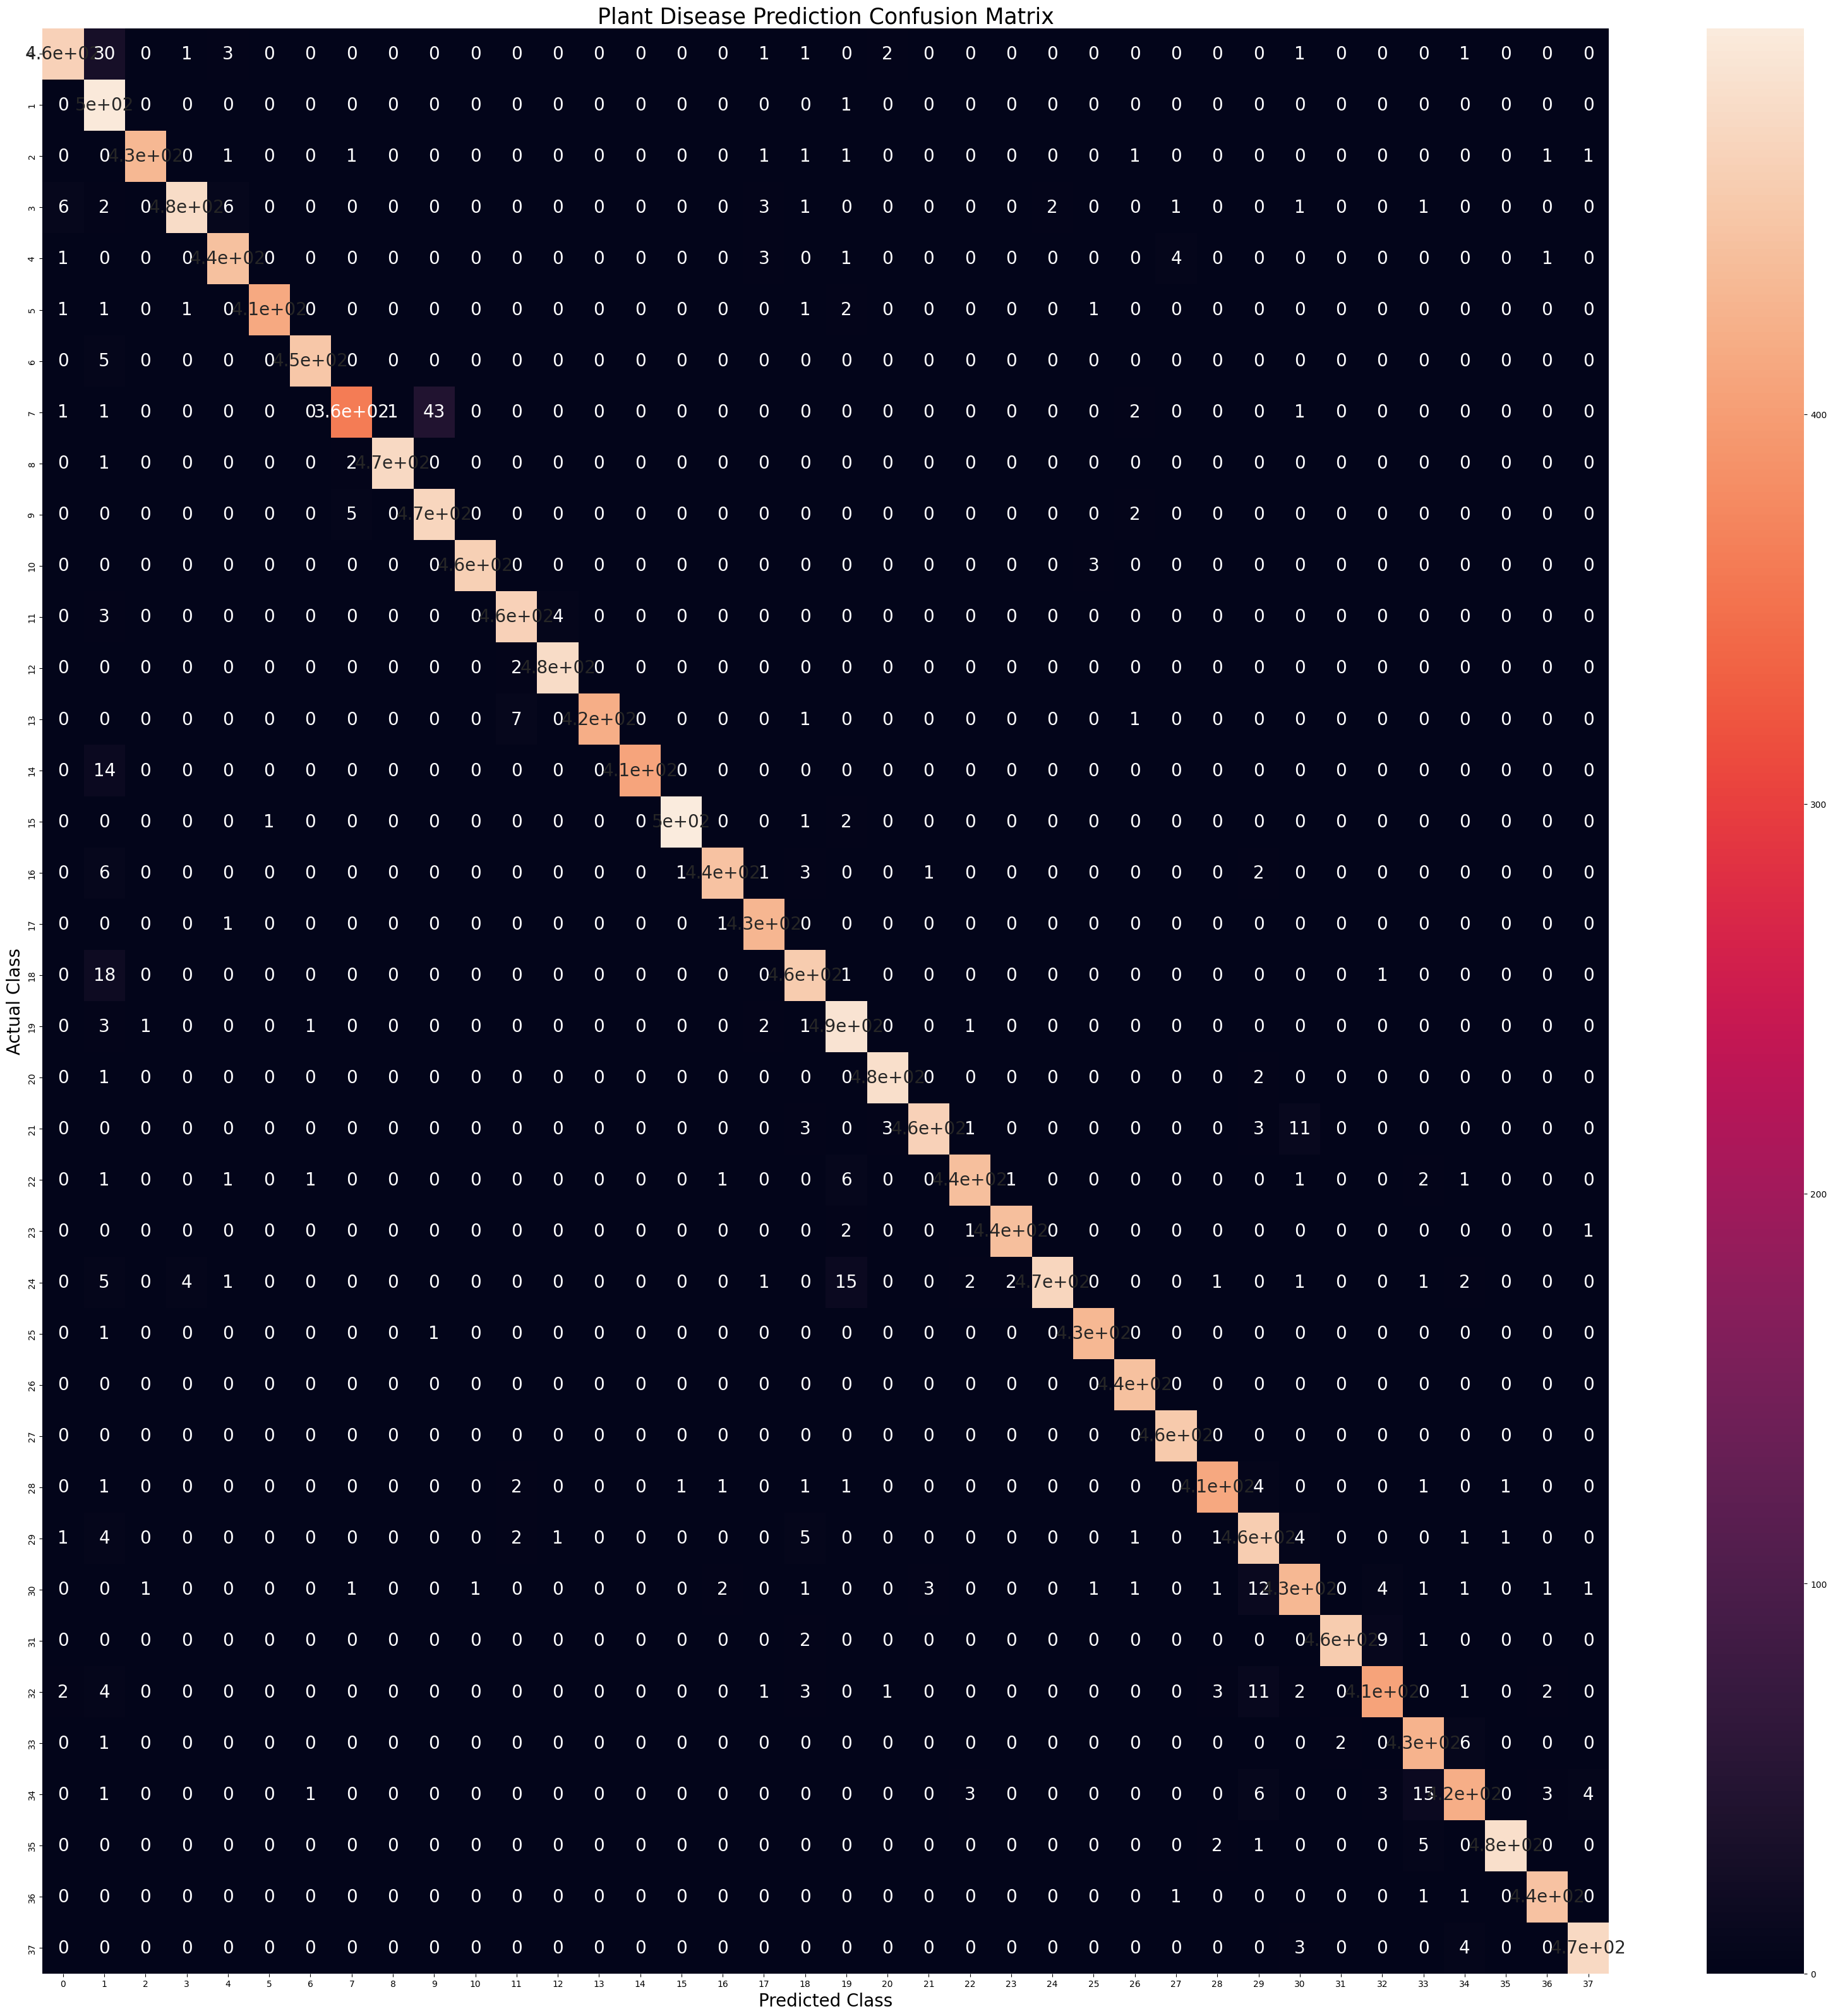

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 20})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()